In [44]:
# import standard modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Topic 4 - Parameter fitting

## Motivation

We again consider a simple empricial relation

$
y = a x + b + z
$

between the input $x$ and output of an experiment. Here $z$ denotes a random error term with values
drawn from a zero-mean normal distribution. The code below generates a data set for us to work with. 

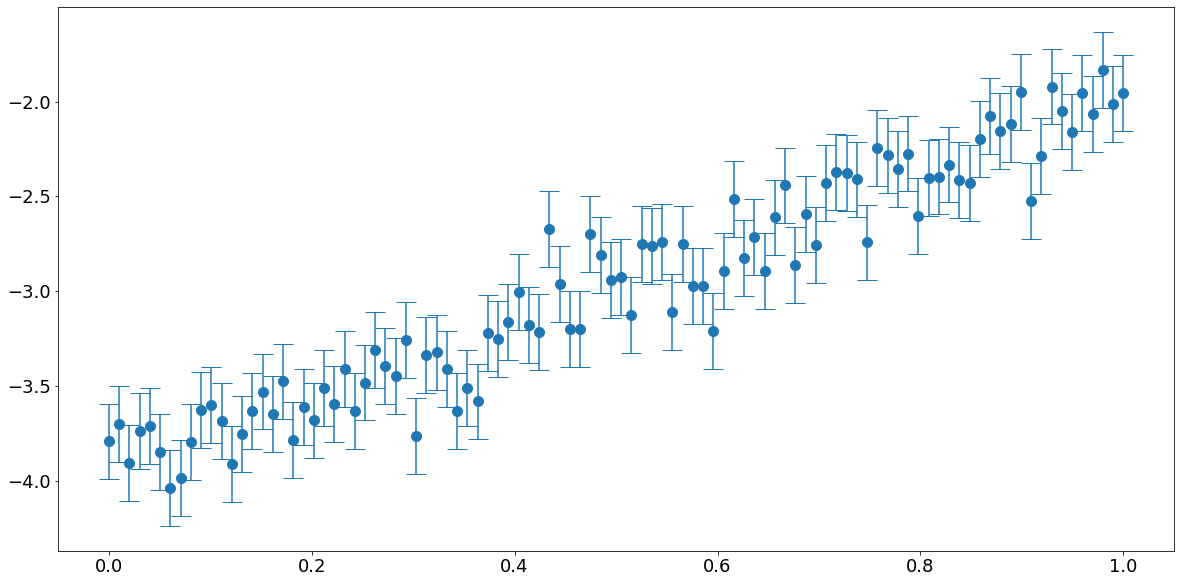

In [45]:
# Set the number of data
n = 100

# Set the true values for the parameters
a =  2
b = -4

# Set the values of x
x = np.linspace(0,1,n)

# Set the error distribution
sigma = 0.2
p = stats.norm(scale = sigma)

# Get the values of y
y = a*x + b + p.rvs(n)

# Plot the data
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 10)
plt.errorbar(x,y,yerr=sigma,linestyle='none',marker='o',markersize = 10,capsize = 10)
plt.show()

As before, we forget that we know that the true values of $(a,b)$ are. Previously we saw how the viability of a proposed model could be tested. Here, instead we ask how suitable values for the model parameters can be generated. 

# Maximum likelihood estimates

Recall that given proposed values of the model parameters we can compute normalised data residuals


$
\bar{z}_{i} = \frac{ y_{i} - a x_{i} - b}{\sigma} 
$

If the parameters are correct, then these are $n$-samples drawn from a standard normal distribution. Recall that the pdf for such a distribtion is given by


$
p(z) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{-z^{2}}{2}
\right).
$

By assumption, the values of the $\bar{z}_{i}$ are indepedent, and hence their joint PDF is

$
p(z_{1},\dots,z_{n}) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{-z_{1}^{2}}{2}\right) \times
\cdots \times \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{-z_{n}^{2}}{2}\right)
 = \frac{1}{\sqrt{(2\pi)^{n}}}\exp\left(
 -\frac{1}{2}\sum_{i=1}^{n} z_{i}^{2}
 \right).
$

If we put the observed values of the data residuals into this PDF, we find

$
p(\bar{z}_{1},\dots,\bar{z}_{n}) = \frac{1}{\sqrt{(2\pi)^{n}}}\exp\left(
 -\frac{1}{2}\sum_{i=1}^{n} \bar{z}_{i}^{2}
 \right) = \frac{1}{\sqrt{(2\pi)^{n}}}\exp\left(
 -\frac{1}{2}\chi^{2}
 \right), 
$

where we have recalled the definition of the $\chi^{2}$ statistic. From the PDF, we can compute probabilities
via integration. In doing so, we know that regions where the PDF is large will have proportionally higher probabilities. It should seem reasonable, therefore, to seek model parameters, $(a,b)$ that make $p(\bar{z}_{1},\dots,\bar{z}_{n}) $ as big as possible. We can write this value explicitly as
a function of the model parameters

$
L(a,b) = p(\bar{z}_{1},\dots,\bar{z}_{n}) =  \frac{1}{\sqrt{(2\pi)^{n}}}\exp\left[
 -\frac{1}{2}\sum_{i=1}^{n} \left(\frac{ y_{i} - a x_{i} - b}{\sigma} \right)^{2}
 \right], 
$

which is known as the **likelihood**. It is not difficult to see that in this situation, 
maximisation $L(a,b)$ is equivalent to minimising the **negative log-likelihood**
which is defined to be

$
l(a,b) = - \ln L(a,b), 
$

and in turn this is the same as minimising 

$
J(a,b) = \frac{1}{2}\sum_{i=1}^{n} \left(\frac{ y_{i} - a x_{i} - b}{\sigma} \right)^{2}.
$

The latter is a simple quadratic function of the model parameters. We can find the desired
minimum value by setting the derivatives of $J$ with respect to $a$ and $b$ equal to zero. It is a matter
of some algebra to show that the optimal values are

$
a = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{n} (x_{i}-\bar{x})^{2}}, \\
b = \sum_{i=1}^{n}(y_{i}-a x_{i}), 
$

where $\bar{x}$ and $\bar{y}$ denote arithmetic averages. The code below computes this
**maximum likelihood estimate** and compares the results to the data. 

optimal values are: a =  1.9817, b = -3.9636


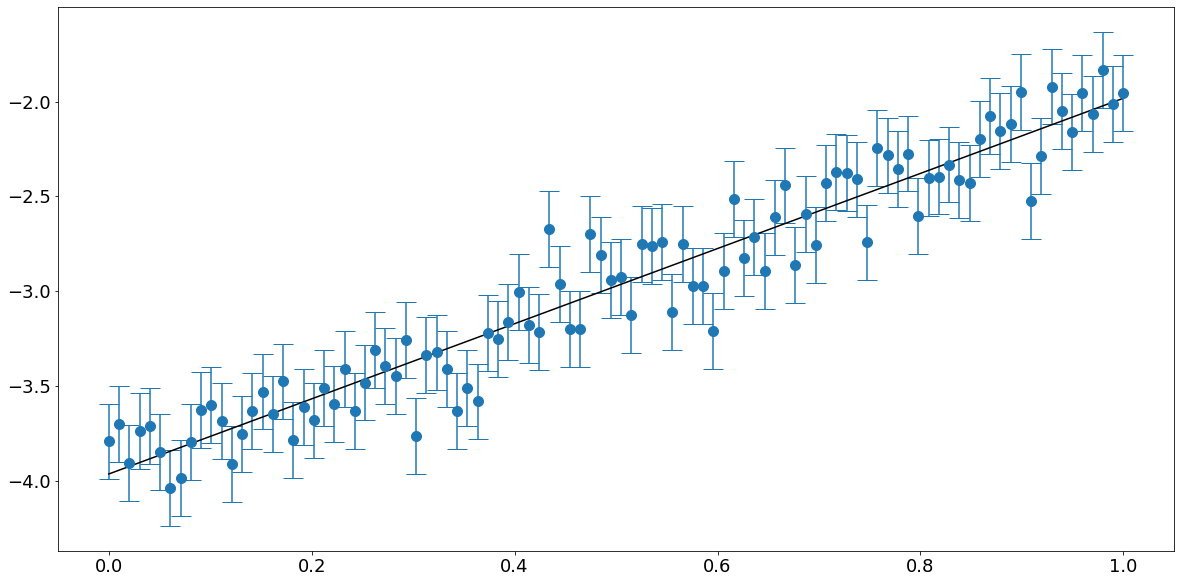

In [46]:
# Compute optimal values for the model parameters
xbar = np.average(x)
ybar = np.average(y)
a = np.sum( (x - xbar) * (y - ybar)) / np.sum( (x-xbar)**2)
b = ybar - a*xbar
print("optimal values are: a = %7.4f, b = %7.4f" % (a,b))

# Plot the results
xx = np.linspace(0,1,100)
yy = a*xx+b
plt.errorbar(x,y,yerr=sigma,linestyle='none',marker='o',markersize = 10,capsize = 10)
plt.plot(xx,yy,'k')
plt.show()

Visually, the line produced should seem to fit the data well. In this situation, we can also compare the parameters obtained with the true values used to generate the data. But what we should really do is perform a suitable hypothesis test to see if the model is acceptable. This is done in the code below using the 
chi-squared test discussed within Topic 3:

In [32]:
# compute the normalised residuals for the proposed model
z = (y - a*x - b)/sigma

# Compute the value of chi2 from the data
chi2 = np.sum(z*z)

# Compute the p-value
Chi2 = stats.chi2(n)
pv = 1 - Chi2.cdf(chi2)
print("p-value = %7.4f" % pv)

p-value =  0.7062


Looking at the p-value, we see that this model would be accepted for any sensible choice of significance level. 

The application of the maximum likelihood method discussed here is very simple. But the same ideas can be applied to deal with far mode complex statistical models, with more parameters, and with different error distributions. In such situations, it can then be necessary to solve difficult optimisation problems using numerical methods. We will not discuss this further, but simply note that for *most* of the problems you are likely to encounter, the necessary calcuations can be performed using freely available code.  


## Estimating uncertainties on the model parameters

We have now seen that the maximum likelihood method can lead values for the model parameters that explain the observed data. In practice, however, there will be a range of possible answers that could be accepted, and this range should be quantified.  There exist a range of possible methods for uncertainty quantification, but here we just point to one general class of methods. Suppose
we wish to determine the range of possible values for the slope, $a$, within our model. To do this, we can 
combine the methods developed so far in the following manner:

1. Choose a significance level, $\alpha$, we deeem acceptable. 
2. For a proposed value of $a$, we can seek the value of $b$ that minimises the chi-squared statistic. This 
requires the solution of a simpler maximum likelihood problem involving a single model parameter, $b$.
3. For the model obtained, we conduct a chi-squared test. If the model passes, we accept the value of $a$
as plausible, and if not, we reject it. 
4. Select another value of $a$ and repeat the process. In this manner, we can map out all plausible slopes.

The code below shows how this can be done in practice.  

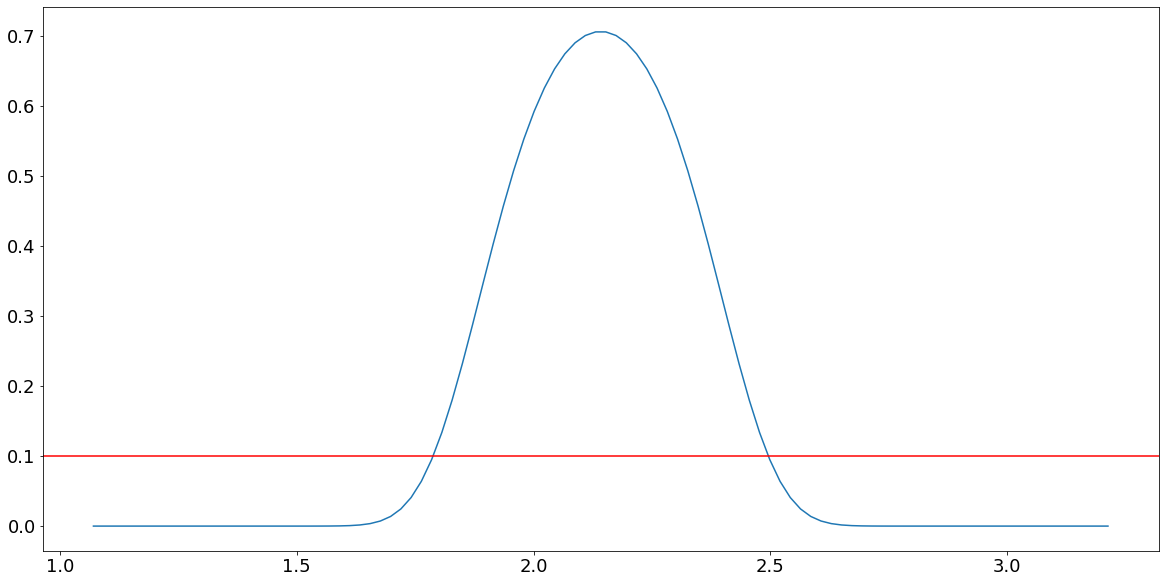

In [43]:
# Set the significant level for the tests
alpha = 0.1


# Define a function that solves for the optimal value of b given the data and a
def FindOptimalIntercept(x,y,a):
    return np.sum(y-a*x)/x.size

# Use the maximum likelihood soltution to propose a sensible range of slopes to test
f = 0.5
a1 = (1-f)*a
a2 = (1+f)*a
nSlopes = 100
aa = np.linspace(a1,a2,nSlopes)

# For each slope compute a p-value
pp = np.zeros(nSlopes)
for i in range(nSlopes):
    # Get optimal intercept
    b = FindOptimalIntercept(x,y,aa[i])
    # compute normalise residuals
    z = (y- aa[i] * x-b) / sigma
    chi2 = np.sum(z*z)
    Chi2 = stats.chi2(n)
    pp[i] = 1 - Chi2.cdf(chi2)
    
# Plot the p-values as a function of the slope and showing the significance level
plt.plot(aa,pp)
plt.axhline(y = alpha, color = 'r')
plt.show()